In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pdb
from copy import deepcopy

path_gpx = 'dataset/gp_x.csv'
path_gpt = 'dataset/gp_t.csv'
path_x = 'dataset/x_train.csv'
path_t = 'dataset/t_train.csv'

gp_x = pd.read_csv(path_gpx)
gp_t = pd.read_csv(path_gpt)
data_x = pd.read_csv(path_x)
data_t = pd.read_csv(path_t)

# Gaussian Process
reference: https://ithelp.ithome.com.tw/articles/10195620

In [3]:
class GaussianProcess:
    def __init__(self, beta_inv, theta):
        self.beta_inv = beta_inv
        self.theta = theta

    
    # eq.6.63 @ p307
    def kernel(self, x_n, x_m):
        return self.theta[0] * np.exp(-0.5 * self.theta[1] * np.subtract.outer(x_n, x_m) **2) \
                + self.theta[2] + self.theta[3] * np.multiply.outer(x_n, x_m)
    
    def fit(self, x_train, t_train):
        self.x_train = x_train
        self.t_train = t_train
        
        # eq6.62
        C = self.kernel(x_train, x_train) + beta_inv * np.eye(x_train.shape[0])
        self.C_inv = np.linalg.inv(C)
    
    
    def predict(self, x):
        self.x_test = x 
        
        # eq6.65 @ p308
        self.C = self.kernel(x, x) + beta_inv # scalar c (小c) -> ask why not scalar
        k = self.kernel(self.x_train, x)# test k
        cov = self.C - np.linalg.multi_dot([k.T, self.C_inv, k]) # eq.6.67

        # eq6.66 
        mean = np.linalg.multi_dot([k.T, self.C_inv, self.t_train])
        std = np.sqrt(np.diag(cov)) 
        # pdb.set_trace()
        
        return mean, std
                
    def theta_diff(self, term): # calculate differientiation
        out     ply.outer(self.x_train, self.x_train)

    
    def log_likelihood(self, td):
        return -0.5 * np.trace(self.C_inv.dot(td)) + \
        0.5 * np.linalg.multi_dot([self.t_train.T, self.C_inv, td, self.C_inv, self.t_train])

    # p313
    def ard(self, lr , thres):
        epoch = 0
        store_thetas = self.theta
        update = np.zeros((4,1))
        
        while True:
            epoch += 1
            for i in range(4): # in each theta params
                #print(self.theta_diff(i))
                update[i] = self.log_likelihood(self.theta_diff(i))
#             print(self.C_inv)
                
            # pdb.set_trace()
            new_theta = np.array(self.theta).reshape(-1,1) + lr * update
            self.theta = new_theta.reshape(-1).tolist()
            
            store_thetas.append(self.theta)
            
            print(f'epoch {epoch}: theta{self.theta}')
            # pdb.set_trace()
            self.C_inv = np.linalg.inv(self.kernel(self.x_train, self.x_train) + \
            beta_inv * np.eye(self.x_train.shape[0]))
            
            
            if max(np.absolute(update)) < thres or epoch == 100:
                print('terminates')
                break;    
        return store_thetas


In [6]:
def RMS(y, t):
    return np.sqrt(np.mean((y - t) ** 2)) 


def plotGP():
    x_axis = np.linspace(0, 1, 1000) # the x_axis of the line
    mean, std = model.predict(x_axis)
    
    plt.figure()
    plt.title(f'theta = {THETA}')
    plt.xlabel('x')
    plt.ylabel('t')
    plt.plot(x_axis, mean,'-', c='black', label='prediction')
    plt.fill_between(x_axis, mean + std, mean - std, alpha=0.5, color='grey')
    plt.scatter(train_gpx, train_gpt, c='b',label='train data')
    plt.legend(loc='best')
    plt.show()
    return 0

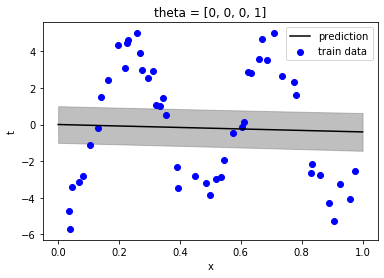

Train RMSE: 3.17119
Test RMSE: 3.30463


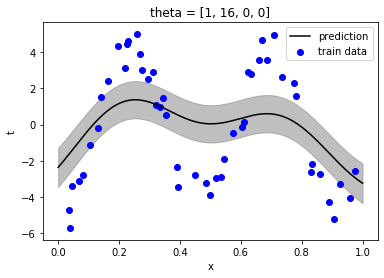

Train RMSE: 2.43623
Test RMSE: 2.6503


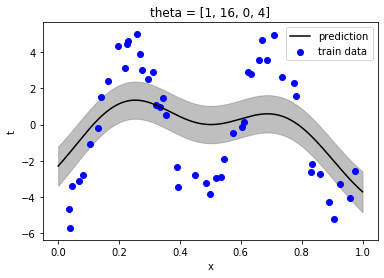

Train RMSE: 2.42429
Test RMSE: 2.63986
ard start
epoch 1: theta[2.8774413975246476, 64.0, 31.999249190761418, -0.009112257608700746]
epoch 2: theta[3.1687252650607216, 64.0, 31.99851226909017, -0.012154800771149511]
epoch 3: theta[3.410041340675923, 64.0, 31.997776895813157, -0.014940667376110958]
epoch 4: theta[3.618675658458601, 64.0, 31.997042769753065, -0.017551018024282765]
epoch 5: theta[3.8038525466388173, 64.0, 31.996309701485107, -0.020030585308520685]
epoch 6: theta[3.971181764395153, 64.0, 31.995577558778514, -0.022407330281923828]
epoch 7: theta[4.124372640375521, 64.0, 31.994846243101104, -0.02470019513928589]
epoch 8: theta[4.266026189155018, 64.0, 31.99411567765488, -0.02692275654127981]
epoch 9: theta[4.398047681436458, 64.0, 31.993385800578146, -0.02908516163454048]
epoch 10: theta[4.521880801009429, 64.0, 31.992656560769838, -0.031195244205293925]
epoch 11: theta[4.638649474961518, 64.0, 31.99192791516963, -0.03325921056024998]
epoch 12: theta[4.7492482912271505, 64.0

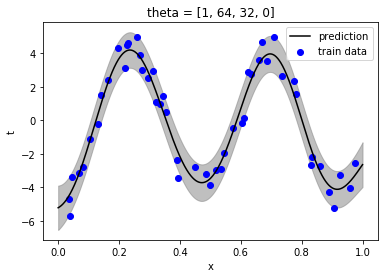

Train RMSE: 0.68767
Test RMSE: 1.05566


In [94]:

# data preprocess
train_gpx = np.array(gp_x[:50]).reshape(-1)
train_gpt = np.array(gp_t[:50]).reshape(-1)
test_gpx = np.array(gp_x[50:]).reshape(-1)
test_gpt = np.array(gp_t[50:]).reshape(-1)

#hyperparameters
theta_ls = [[0, 0, 0, 1], [1, 16, 0, 0], [1, 16, 0, 4], [1, 64, 32 , 0]] 
beta_inv = 1
lr = 5 * 1e-2
thres = 1

#%%
for THETA in theta_ls:

    # Generate Gaussian process model
    model = GaussianProcess(beta_inv, deepcopy(THETA))
    
    # Fit training data
    model.fit(train_gpx, train_gpt)
    
    if THETA ==[1, 64, 32, 0]:     
        print('ard start')
        store_thetas = model.ard(lr, thres)
    
    # Plot prediction
    plotGP()
    
    # RMSE
    mean_train, _ = model.predict(train_gpx)
    rms_train = RMS(mean_train, train_gpt)
    
    mean_test, _ = model.predict(test_gpx)
    rms_test = RMS(mean_test, test_gpt)
    
    print(f'Train RMSE: {round(rms_train,5)}')
    print(f'Test RMSE: {round(rms_test,5)}')

# ARD

[1, 64, 32, 0]


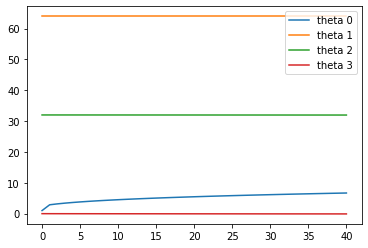

In [74]:
print(THETA)
# print(.shape)
origin_theta = np.array(THETA).reshape(1, -1)

store_thetas = np.array(store_thetas[4:])
plot_thetas = np.concatenate((origin_theta, store_thetas), axis=0)

plt.figure()
plt.plot(plot_thetas[:,0], label='theta 0')
plt.plot(plot_thetas[:,1], label='theta 1')
plt.plot(plot_thetas[:,2], label='theta 2')
plt.plot(plot_thetas[:,3], label='theta 3')
plt.legend(loc='best')